In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data, meta = arff.loadarff('../datasets/rawData/desharnais.arff')
df = pd.DataFrame(data)
df.to_csv('../datasets/desharnais.csv', index = False)

In [8]:
df = pd.read_csv('../datasets/desharnais.csv')
print(df.head())


   Project  TeamExp  ManagerExp  YearEnd  Length  Effort  Transactions  \
0      1.0      1.0         4.0     85.0    12.0  5152.0         253.0   
1      2.0      0.0         0.0     86.0     4.0  5635.0         197.0   
2      3.0      4.0         4.0     85.0     1.0   805.0          40.0   
3      4.0      0.0         0.0     86.0     5.0  3829.0         200.0   
4      5.0      0.0         0.0     86.0     4.0  2149.0         140.0   

   Entities  PointsAdjust  Envergure  PointsNonAjust Language  
0      52.0         305.0       34.0           302.0     b'1'  
1     124.0         321.0       33.0           315.0     b'1'  
2      60.0         100.0       18.0            83.0     b'1'  
3     119.0         319.0       30.0           303.0     b'1'  
4      94.0         234.0       24.0           208.0     b'1'  


# 1 Conversion to Numerical Data

All columns appear to be numeric (float64) already, so no additional conversion is needed.

In [4]:
print("\n Conversion to Numerical Data")
print("\n Data types of columns:")
print(df.dtypes)
print(df.head())


 Conversion to Numerical Data

 Data types of columns:
Project           float64
TeamExp           float64
ManagerExp        float64
YearEnd           float64
Length            float64
Effort            float64
Transactions      float64
Entities          float64
PointsAdjust      float64
Envergure         float64
PointsNonAjust    float64
Language           object
dtype: object
   Project  TeamExp  ManagerExp  YearEnd  Length  Effort  Transactions  \
0      1.0      1.0         4.0     85.0    12.0  5152.0         253.0   
1      2.0      0.0         0.0     86.0     4.0  5635.0         197.0   
2      3.0      4.0         4.0     85.0     1.0   805.0          40.0   
3      4.0      0.0         0.0     86.0     5.0  3829.0         200.0   
4      5.0      0.0         0.0     86.0     4.0  2149.0         140.0   

   Entities  PointsAdjust  Envergure  PointsNonAjust Language  
0      52.0         305.0       34.0           302.0     b'1'  
1     124.0         321.0       33.0         

In [ ]:
language_map = {"b'1'": 1, "b'2'": 2, "b'3'": 3}

df['Language'] = df['Language'].map(language_map)
df.head()

,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsAdjust,Envergure,PointsNonAjust,Language
0,1.0,1.0,4.0,85.0,12.0,5152.0,253.0,52.0,305.0,34.0,302.0,1
1,2.0,0.0,0.0,86.0,4.0,5635.0,197.0,124.0,321.0,33.0,315.0,1
2,3.0,4.0,4.0,85.0,1.0,805.0,40.0,60.0,100.0,18.0,83.0,1
3,4.0,0.0,0.0,86.0,5.0,3829.0,200.0,119.0,319.0,30.0,303.0,1
4,5.0,0.0,0.0,86.0,4.0,2149.0,140.0,94.0,234.0,24.0,208.0,1


# 2 Sequential Conversion and Time Indexing


In [ ]:
# print(df['Duration'].value_counts().sort_index())

# print("\n=== Sequential conversion and time indexing ===")
# df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
# df = df.rename(columns={'Duration': 'DurationMonths'})
# df = df.sort_values('DurationMonths')
# df = df.set_index('DurationMonths')

# print("The first 5 rows of the newly created 'DurationMonths' index:")
# print(df.index[:5])

# 3 Missing Data Processing

Check and handle NaN values to ensure data completeness. Fill missing values in numeric columns with the mean.

In [10]:
print("\nMissing Data Processing")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values")
else:
    print("Have missing values")
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


Missing Data Processing
Have missing values


### Handling Negative Values

The China dataset doesn’t explicitly show negative values in the sample, but we’ll add a check for safety.

In [ ]:
# print("\nHandling negative values:")
# if (df < 0).any().any():
#     df[df < 0] = 0
#     print("Replaced negative values with 0.")
# else:
#     print("No negative values found in the dataset.")

# 4 Handling Outliers (Value Capping)

Mitigate the impact of outliers by capping them within an acceptable range based on the IQR.

In [11]:
print("\nHandling Outliers (Value Capping)")
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    cap_outliers(df, col)

print("Outliers capped using IQR method.")


Handling Outliers (Value Capping)
Outliers capped using IQR method.


# 6. Data Splitting

Split the dataset into training and testing sets using an 80/20 ratio, with 'Effort' as the target variable.

In [12]:
print("\nData Splitting (Partitioning)")
X = df.drop(columns=['Effort','Project'])  # Drop 'ID' as it’s not a feature
y = df['Effort']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total number of samples: {len(df)}")
print(f"- Training samples (X_train): {len(X_train)}")
print(f"- Testing samples (X_test): {len(X_test)}")


Data Splitting (Partitioning)
Total number of samples: 81
- Training samples (X_train): 64
- Testing samples (X_test): 17


# 7. Data Standardization

Standardize features using StandardScaler for zero mean and unit variance.

In [ ]:
# print("\nData Standardization (StandardScaler)")
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# X_train_scaled = scaler_X.fit_transform(X_train)
# X_test_scaled = scaler_X.transform(X_test)

# y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
# y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# print("\nStatistics before standardization (X_train):")
# print(X_train.describe().T[['mean', 'std']])

# print("\nStatistics after standardization (X_train_scaled):")
# print(X_train_scaled_df.describe().T[['mean', 'std']])


# 8. Inverse Transformation

Apply inverse transformation to return standardized data to its original scale.

In [ ]:
# print("\nInverse Transformation")

# X_train_original = scaler_X.inverse_transform(X_train_scaled)
# y_train_original = scaler_y.inverse_transform(y_train_scaled)

# X_train_original_df = pd.DataFrame(X_train_original, columns=X_train.columns, index=X_train.index)

# print("\n=== X_train data after inverse transformation (original scale) ===")
# print(pd.DataFrame(X_train_original, columns=X_train.columns).head())

# print("\n=== y_train target after inverse transformation ===")
# print(y_train_original[:5].flatten())


In [13]:
df.to_csv("../datasets/cleanedData/desharnais_processed.csv", index=True)

# 8. LSTM


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from mealpy import FloatVar, IntegerVar, WOA
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../datasets/cleanedData/desharnais_processed.csv")

# Features and target
X = df.drop(columns=['Effort', 'Project']).values
y = df['Effort'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Reshape for LSTM (samples, timesteps, features)
input_shape = (X_train_scaled.shape[1], 1)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


In [16]:

# Define the LSTM model creation function
def create_lstm_model(learning_rate, epochs, batch_size, input_shape):
    model = Sequential()
    model.add(LSTM(units=64, activation='tanh', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Regression output
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Objective function for optimization
def objective_function(solution, X_train, y_train, input_shape, use_sequences=True):
    learning_rate, epochs, batch_size = solution
    model = create_lstm_model(learning_rate, epochs, batch_size, input_shape)
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0, validation_split=0.2)
    y_pred_scaled = model.predict(X_train, verbose=0).flatten()
    mse = mean_squared_error(y_train, y_pred_scaled)
    return mse

# Define the problem dictionary with bounds
problem_dict = {
    "obj_func": lambda solution: objective_function(solution, X_train_scaled, y_train_scaled, input_shape),
    "bounds": [
        FloatVar(lb=0.0001, ub=1, name="learning_rate"),
        IntegerVar(lb=1, ub=100, name="epochs"),
        IntegerVar(lb=1, ub=100, name="batch_size")
    ],
    "minmax": "min"
}

In [17]:
# Run WOA
optimizer = WOA.OriginalWOA(epoch=10, pop_size=30)
best_solution = optimizer.solve(problem_dict)

# Extract optimized hyperparameters
best_learning_rate = best_solution.solution[0]
best_epochs = int(best_solution.solution[1])
best_batch_size = int(best_solution.solution[2])

print(f"Optimized Hyperparameters: Learning Rate = {best_learning_rate:.6f}, Epochs = {best_epochs}, Batch Size = {best_batch_size}")


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025/06/09 08:45:30 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\

Optimized Hyperparameters: Learning Rate = 0.087790, Epochs = 50, Batch Size = 4


In [22]:

# Build and train the final LSTM
final_model = create_lstm_model(best_learning_rate, best_epochs, best_batch_size, input_shape)
history = final_model.fit(X_train_scaled, y_train_scaled, epochs=best_epochs, batch_size=best_batch_size,
                          verbose=1, validation_split=0.2)

# Predict on test set (in scaled space)
y_pred_scaled = final_model.predict(X_test_scaled, verbose=0).flatten()

# Reverse transform predictions and test values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred_scaled)

# Calculate relative errors for MMRE and MdMRE
relative_errors = np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)
mmre = np.mean(relative_errors)
mdmre = np.median(relative_errors)

# Calculate PRED(25)
pred25 = np.mean(relative_errors <= 0.25) * 100

# Print all metrics
print(f"\nEvaluation Metrics (Scaled):")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MMRE: {mmre:.4f}")
print(f"MdMRE: {mdmre:.4f}")
print(f"PRED(25): {pred25:.2f}%")

# Display actual vs predicted values
print("\nActual vs Predicted (Original Scale):")
for actual, pred in zip(y_test_original, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")


Epoch 1/50


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 43.2605 - val_loss: 3.4505
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7621 - val_loss: 0.2706
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2567 - val_loss: 0.0575
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0640 - val_loss: 0.0583
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0916 - val_loss: 0.1043
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0897 - val_loss: 0.0809
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0648 - val_loss: 0.1499
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0979 - val_loss: 0.0915
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0567 - val_loss: 0.0857
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0243 - val_loss: 0.0853
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0400 - val_loss: 0.1646
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0449 - val_loss: 0.040

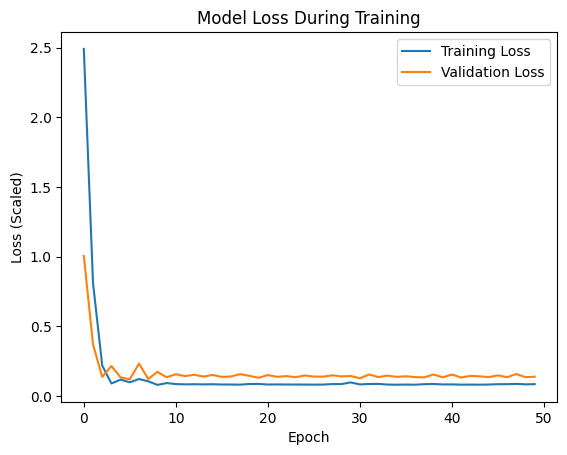

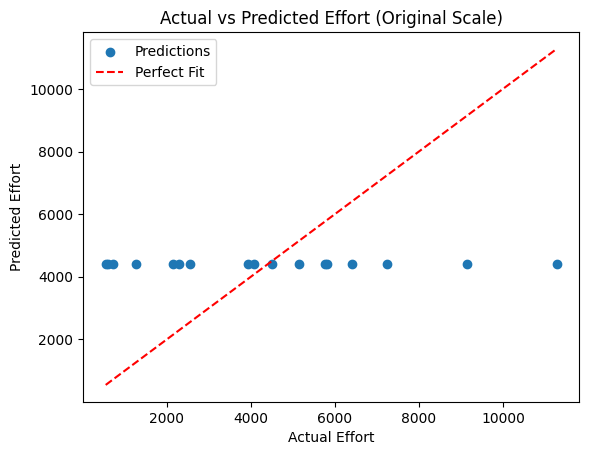

In [19]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (Scaled)')
plt.legend()
plt.show()

# Plot actual vs predicted
plt.scatter(y_test_original, y_pred, label='Predictions')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', label='Perfect Fit')
plt.xlabel('Actual Effort')
plt.ylabel('Predicted Effort')
plt.title('Actual vs Predicted Effort (Original Scale)')
plt.legend()
plt.show()

# CNN

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025/06/10 08:52:02 AM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do no

Optimized Hyperparameters: Learning Rate = 0.025311, Epochs = 29, Batch Size = 11
Epoch 1/29


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.2758 - val_loss: 0.2387
Epoch 2/29
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1408 - val_loss: 0.0851
Epoch 3/29
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0726 - val_loss: 0.1079
Epoch 4/29
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0506 - val_loss: 0.0752
Epoch 5/29
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0438 - val_loss: 0.0706
Epoch 6/29
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0495 - val_loss: 0.0892
Epoch 7/29
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0556 - val_loss: 0.0590
Epoch 8/29
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - val_loss: 0.1103
Epoch 9/29
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0629 - val_loss: 0.0457
Epoch 10/29
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0576 - val_loss: 0.0876
Epoch 11/29
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0446 - val_loss: 0.0762
Epoch 12/29
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0522 - val_loss: 0.0474
Epoch 13/29


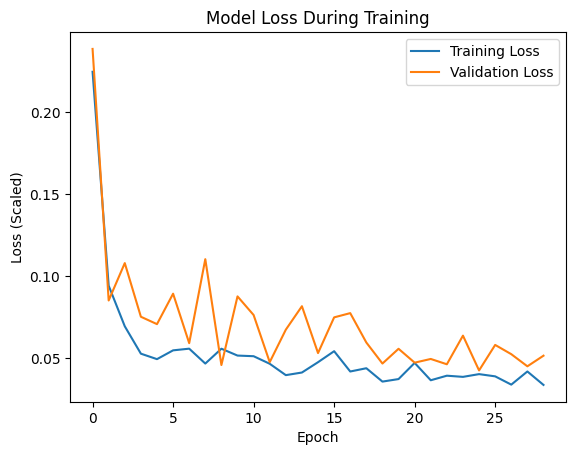

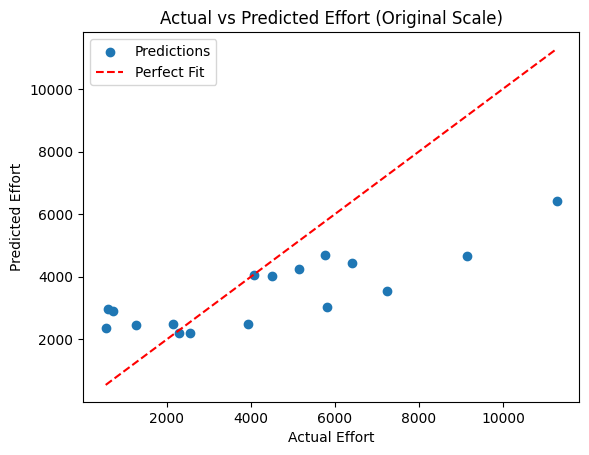

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from mealpy import FloatVar, IntegerVar, WOA
import matplotlib.pyplot as plt


df = pd.read_csv("../datasets/cleanedData/desharnais_processed.csv")

# Features and target
X = df.drop(columns=['Effort', 'Project']).values
y = df['Effort'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Reshape for 1D CNN (samples, timesteps, features)
input_shape = (X_train_scaled.shape[1], 1)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model creation function
def create_cnn_model(learning_rate, epochs, batch_size, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Regression output
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Define the objective function for WOA
def objective_function(solution, X_train, y_train, input_shape, use_sequences=True):
    learning_rate, epochs, batch_size = solution
    model = create_cnn_model(learning_rate, epochs, batch_size, input_shape)
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0, validation_split=0.2)
    y_pred_scaled = model.predict(X_train, verbose=0).flatten()
    mse = mean_squared_error(y_train, y_pred_scaled)
    return mse

# Define the problem dictionary with bounds
problem_dict = {
    "obj_func": lambda solution: objective_function(solution, X_train_scaled, y_train_scaled, input_shape, use_sequences=True),
    "bounds": [
        FloatVar(lb=0.0001, ub=1, name="learning_rate"),
        IntegerVar(lb=1, ub=100, name="epochs"),
        IntegerVar(lb=1, ub=100, name="batch_size")
    ],
    "minmax": "min"
}

# Run WOA
optimizer = WOA.OriginalWOA(epoch=10, pop_size=30)
best_solution = optimizer.solve(problem_dict)

# Extract optimized hyperparameters
best_learning_rate = best_solution.solution[0]
best_epochs = int(best_solution.solution[1])
best_batch_size = int(best_solution.solution[2])

print(f"Optimized Hyperparameters: Learning Rate = {best_learning_rate:.6f}, Epochs = {best_epochs}, Batch Size = {best_batch_size}")

# Build and train the final CNN
final_model = create_cnn_model(best_learning_rate, best_epochs, best_batch_size, input_shape)
history = final_model.fit(X_train_scaled, y_train_scaled, epochs=best_epochs, batch_size=best_batch_size,
                          verbose=1, validation_split=0.2)

# Predict on test set (in scaled space)
y_pred_scaled = final_model.predict(X_test_scaled, verbose=0).flatten()

# Reverse transform predictions and test values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred_scaled)

# Calculate relative errors for MMRE and MdMRE
relative_errors = np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)
mmre = np.mean(relative_errors)
mdmre = np.median(relative_errors)

# Calculate PRED(25)
pred25 = np.mean(relative_errors <= 0.25) * 100

# Print all metrics
print(f"\nEvaluation Metrics (Scaled):")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MMRE: {mmre:.4f}")
print(f"MdMRE: {mdmre:.4f}")
print(f"PRED(25): {pred25:.2f}%")

# Display actual vs predicted values
print("\nActual vs Predicted (Original Scale):")
for actual, pred in zip(y_test_original, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (Scaled)')
plt.legend()
plt.show()

# Plot actual vs predicted
plt.scatter(y_test_original, y_pred, label='Predictions')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', label='Perfect Fit')
plt.xlabel('Actual Effort')
plt.ylabel('Predicted Effort')
plt.title('Actual vs Predicted Effort (Original Scale)')
plt.legend()
plt.show()

# MLP

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from mealpy import FloatVar, IntegerVar, WOA
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../datasets/cleanedData/desharnais_processed.csv")

# Features and target
X = df.drop(columns=['Effort', 'Project']).values
y = df['Effort'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Input shape for MLP (samples, features)
input_shape = (X_train_scaled.shape[1],)

# Define the MLP model creation function
def create_mlp_model(learning_rate, epochs, batch_size, input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Regression output
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Define the objective function for WOA
def objective_function(solution, X_train, y_train, input_shape):
    learning_rate, epochs, batch_size = solution
    model = create_mlp_model(learning_rate, epochs, batch_size, input_shape)
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0, validation_split=0.2)
    y_pred_scaled = model.predict(X_train, verbose=0).flatten()
    mse = mean_squared_error(y_train, y_pred_scaled)
    return mse

# Define the problem dictionary with bounds
problem_dict = {
    "obj_func": lambda solution: objective_function(solution, X_train_scaled, y_train_scaled, input_shape),
    "bounds": [
        FloatVar(lb=0.0001, ub=1, name="learning_rate"),
        IntegerVar(lb=1, ub=100, name="epochs"),
        IntegerVar(lb=1, ub=100, name="batch_size")
    ],
    "minmax": "min"
}

# Run WOA
optimizer = WOA.OriginalWOA(epoch=5, pop_size=30)
best_solution = optimizer.solve(problem_dict)

# Extract optimized hyperparameters
best_learning_rate = best_solution.solution[0]
best_epochs = int(best_solution.solution[1])
best_batch_size = int(best_solution.solution[2])

print(f"Optimized Hyperparameters: Learning Rate = {best_learning_rate:.6f}, Epochs = {best_epochs}, Batch Size = {best_batch_size}")

# Train the MLP model
final_model = create_mlp_model(best_learning_rate, best_epochs, best_batch_size, input_shape)
history = final_model.fit(X_train_scaled, y_train_scaled, epochs=best_epochs, batch_size=best_batch_size,
                          verbose=1, validation_split=0.2)

# Predict in scaled space
y_pred_scaled = final_model.predict(X_test_scaled, verbose=0).flatten()

# Inverse transform to original space
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Evaluation metrics in scaled space
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
mre_scaled = np.abs((y_test_scaled - y_pred_scaled) / (y_test_scaled + 1e-8))
mmre_scaled = np.mean(mre_scaled)
mdmre_scaled = np.median(mre_scaled)
pred25_scaled = np.mean(mre_scaled <= 0.25) * 100

# Evaluation metrics in original space
mse_original = mean_squared_error(y_test_original, y_pred)
mae_original = mean_absolute_error(y_test_original, y_pred)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred)
mre_original = np.abs((y_test_original - y_pred) / (y_test_original + 1e-8))
mmre_original = np.mean(mre_original)
mdmre_original = np.median(mre_original)
pred25_original = np.mean(mre_original <= 0.25) * 100

# Print metrics in scaled space
print("\n📉 Evaluation Metrics (Scaled Space):")
print(f"MSE       : {mse_scaled:.6f}")
print(f"MAE       : {mae_scaled:.6f}")
print(f"RMSE      : {rmse_scaled:.6f}")
print(f"R²        : {r2_scaled:.6f}")
print(f"MMRE      : {mmre_scaled:.6f}")
print(f"MdMRE     : {mdmre_scaled:.6f}")
print(f"PRED(25)  : {pred25_scaled:.2f}%")

# Print metrics in original space
print("\n📈 Evaluation Metrics (Original Space):")
print(f"MSE       : {mse_original:.6f}")
print(f"MAE       : {mae_original:.6f}")
print(f"RMSE      : {rmse_original:.6f}")
print(f"R²        : {r2_original:.6f}")
print(f"MMRE      : {mmre_original:.6f}")
print(f"MdMRE     : {mdmre_original:.6f}")
print(f"PRED(25)  : {pred25_original:.2f}%")

# Optional: Actual vs Predicted values
print("\n🎯 Actual vs Predicted (Original Scale):")
for actual, pred in zip(y_test_original, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (Scaled)')
plt.legend()
plt.savefig('mlp_training_loss.png')
plt.close()

# Plot actual vs predicted (Original Scale)
plt.scatter(y_test_original, y_pred, label='Predictions')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', label='Perfect Fit')
plt.xlabel('Actual Effort')
plt.ylabel('Predicted Effort')
plt.title('Actual vs Predicted Effort (Original Scale)')
plt.legend()
plt.savefig('mlp_actual_vs_predicted.png')
plt.close()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025/06/10 09:22:11 AM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argume

Optimized Hyperparameters: Learning Rate = 0.005531, Epochs = 54, Batch Size = 9
Epoch 1/54


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1232 - val_loss: 0.2092
Epoch 2/54
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1066 - val_loss: 0.0967
Epoch 3/54
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0633 - val_loss: 0.1211
Epoch 4/54
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0357 - val_loss: 0.0528
Epoch 5/54
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0714 - val_loss: 0.1029
Epoch 6/54
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0349 - val_loss: 0.0634
Epoch 7/54
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0401 - val_loss: 0.0663
Epoch 8/54
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0455 - val_loss: 0.0769
Epoch 9/54
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0292 - val_loss: 0.0617
Epoch 10/54
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0515 - val_loss: 0.0687
Epoch 11/54
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0268 - val_loss: 0.0411
Epoch 12/54
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0367 - val_loss: 0.0996
Epoch 13/54


# BiLSTM

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025/06/10 09:47:13 AM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `

Optimized Hyperparameters: Learning Rate = 0.002693, Epochs = 81, Batch Size = 3, LSTM Units = 99
Epoch 1/81


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1024 - val_loss: 0.1185
Epoch 2/81
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0724 - val_loss: 0.0844
Epoch 3/81
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0570 - val_loss: 0.0609
Epoch 4/81
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0447 - val_loss: 0.0476
Epoch 5/81
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0506 - val_loss: 0.0772
Epoch 6/81
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - val_loss: 0.0552
Epoch 7/81
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0534 - val_loss: 0.0498
Epoch 8/81
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0336 - val_loss: 0.0546
Epoch 9/81
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0398 - val_loss: 0.0772
Epoch 10/81
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0275 - val_loss: 0.0468
Epoch 11/81
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0381 - val_loss: 0.0693
Epoch 12/81
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0386 - val_loss: 0.0551

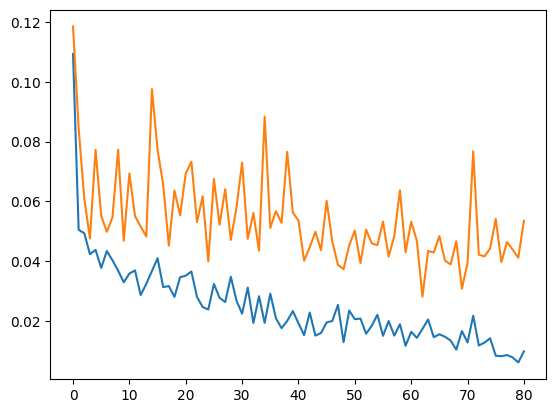

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from mealpy import FloatVar, IntegerVar, WOA
import matplotlib.pyplot as plt
import uuid

# Load data
df = pd.read_csv("../datasets/cleanedData/desharnais_processed.csv")

# Features and target
X = df.drop(columns=['Effort', 'Project']).values
y = df['Effort'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Reshape data for BiLSTM: (samples, timesteps, features)
timesteps = 1
features = X_train_scaled.shape[1]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, features))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, features))
input_shape = (timesteps, features)

# Define the BiLSTM model creation function
def create_bilstm_model(learning_rate, epochs, batch_size, lstm_units, input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=int(lstm_units), activation='tanh'), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Regression output
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Define the objective function for WOA
def objective_function(solution, X_train, y_train, input_shape):
    learning_rate, epochs, batch_size, lstm_units = solution
    model = create_bilstm_model(learning_rate, epochs, batch_size, lstm_units, input_shape)
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0, validation_split=0.2)
    y_pred_scaled = model.predict(X_train, verbose=0).flatten()
    mse = mean_squared_error(y_train, y_pred_scaled)
    return mse

# Define the problem dictionary with bounds
problem_dict = {
    "obj_func": lambda solution: objective_function(solution, X_train_scaled, y_train_scaled, input_shape),
    "bounds": [
        FloatVar(lb=0.0001, ub=1, name="learning_rate"),
        IntegerVar(lb=1, ub=100, name="epochs"),
        IntegerVar(lb=1, ub=100, name="batch_size"),
        IntegerVar(lb=16, ub=128, name="lstm_units")
    ],
    "minmax": "min"
}

# Run WOA
optimizer = WOA.OriginalWOA(epoch=5, pop_size=30)
best_solution = optimizer.solve(problem_dict)

# Extract optimized hyperparameters
best_learning_rate = best_solution.solution[0]
best_epochs = int(best_solution.solution[1])
best_batch_size = int(best_solution.solution[2])
best_lstm_units = int(best_solution.solution[3])

print(f"Optimized Hyperparameters: Learning Rate = {best_learning_rate:.6f}, Epochs = {best_epochs}, Batch Size = {best_batch_size}, LSTM Units = {best_lstm_units}")

# Train the BiLSTM model
final_model = create_bilstm_model(best_learning_rate, best_epochs, best_batch_size, best_lstm_units, input_shape)
history = final_model.fit(X_train_scaled, y_train_scaled, epochs=best_epochs, batch_size=best_batch_size,
                          verbose=1, validation_split=0.2)

# Predict in scaled space
y_pred_scaled = final_model.predict(X_test_scaled, verbose=0).flatten()

# Inverse transform to original space
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Evaluation metrics in scaled space
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
mre_scaled = np.abs((y_test_scaled - y_pred_scaled) / (y_test_scaled + 1e-8))
mmre_scaled = np.mean(mre_scaled)
mdmre_scaled = np.median(mre_scaled)
pred25_scaled = np.mean(mre_scaled <= 0.25) * 100

# Evaluation metrics in original space
mse_original = mean_squared_error(y_test_original, y_pred)
mae_original = mean_absolute_error(y_test_original, y_pred)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred)
mre_original = np.abs((y_test_original - y_pred) / (y_test_original + 1e-8))
mmre_original = np.mean(mre_original)
mdmre_original = np.median(mre_original)
pred25_original = np.mean(mre_original <= 0.25) * 100

# Print metrics in scaled space
print("\n📉 Evaluation Metrics (Scaled Space):")
print(f"MSE       : {mse_scaled:.6f}")
print(f"MAE       : {mae_scaled:.6f}")
print(f"RMSE      : {rmse_scaled:.6f}")
print(f"R²        : {r2_scaled:.6f}")
print(f"MMRE      : {mmre_scaled:.6f}")
print(f"MdMRE     : {mdmre_scaled:.6f}")
print(f"PRED(25)  : {pred25_scaled:.2f}%")

# Print metrics in original space
print("\n📈 Evaluation Metrics (Original Space):")
print(f"MSE       : {mse_original:.6f}")
print(f"MAE       : {mae_original:.6f}")
print(f"RMSE      : {rmse_original:.6f}")
print(f"R²        : {r2_original:.6f}")
print(f"MMRE      : {mmre_original:.6f}")
print(f"MdMRE     : {mdmre_original:.6f}")
print(f"PRED(25)  : {pred25_original:.2f}%")

# Optional: Actual vs Predicted values
print("\n🎯 Actual vs Predicted (Original Scale):")
for actual, pred in zip(y_test_original, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# RNN

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025/06/10 10:23:44 AM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

Optimized Hyperparameters: Learning Rate = 0.005942, Epochs = 74, Batch Size = 20, RNN Units = 89
Epoch 1/74


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.1036 - val_loss: 0.1450
Epoch 2/74
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0686 - val_loss: 0.0613
Epoch 3/74
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0601 - val_loss: 0.0895
Epoch 4/74
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0546 - val_loss: 0.0662
Epoch 5/74
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - val_loss: 0.0656
Epoch 6/74
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0437 - val_loss: 0.0680
Epoch 7/74
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0462 - val_loss: 0.0498
Epoch 8/74
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0434 - val_loss: 0.0539
Epoch 9/74
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0346 - val_loss: 0.0581
Epoch 10/74
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0388 - val_loss: 0.0495
Epoch 11/74
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0306 - val_loss: 0.0719
Epoch 12/74
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0311 - val_loss: 0.0862
Epoch 13/74

Text(0.5, 1.0, 'Simple RNN Model Loss During Training')

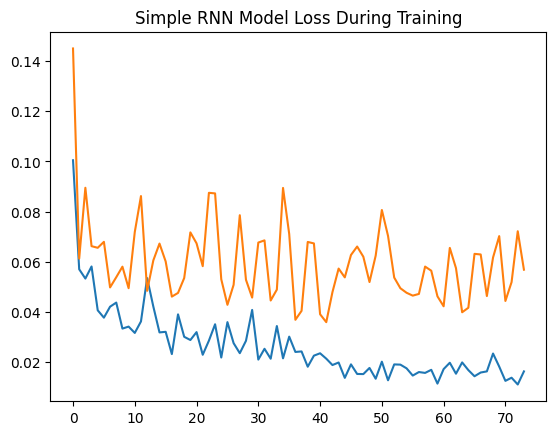

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
from tensorflow.keras.optimizers import Adam
from mealpy import FloatVar, IntegerVar, WOA
import matplotlib.pyplot as plt
import uuid

# Load data
df = pd.read_csv("../datasets/cleanedData/desharnais_processed.csv")

# Features and target
X = df.drop(columns=['Effort', 'Project']).values
y = df['Effort'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Reshape data for RNN: (samples, timesteps, features)
timesteps = 1
features = X_train_scaled.shape[1]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, features))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, features))
input_shape = (timesteps, features)

# Define the RNN model creation function
def create_rnn_model(learning_rate, epochs, batch_size, rnn_units, input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=int(rnn_units), activation='tanh', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Regression output
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Define the objective function for WOA
def objective_function(solution, X_train, y_train, input_shape):
    learning_rate, epochs, batch_size, rnn_units = solution
    model = create_rnn_model(learning_rate, epochs, batch_size, rnn_units, input_shape)
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0, validation_split=0.2)
    y_pred_scaled = model.predict(X_train, verbose=0).flatten()
    mse = mean_squared_error(y_train, y_pred_scaled)
    return mse

# Define the problem dictionary with bounds
problem_dict = {
    "obj_func": lambda solution: objective_function(solution, X_train_scaled, y_train_scaled, input_shape),
    "bounds": [
        FloatVar(lb=0.0001, ub=1, name="learning_rate"),
        IntegerVar(lb=1, ub=100, name="epochs"),
        IntegerVar(lb=1, ub=100, name="batch_size"),
        IntegerVar(lb=16, ub=128, name="rnn_units")
    ],
    "minmax": "min"
}

# Run WOA
optimizer = WOA.OriginalWOA(epoch=5, pop_size=30)
best_solution = optimizer.solve(problem_dict)

# Extract optimized hyperparameters
best_learning_rate = best_solution.solution[0]
best_epochs = int(best_solution.solution[1])
best_batch_size = int(best_solution.solution[2])
best_rnn_units = int(best_solution.solution[3])

print(f"Optimized Hyperparameters: Learning Rate = {best_learning_rate:.6f}, Epochs = {best_epochs}, Batch Size = {best_batch_size}, RNN Units = {best_rnn_units}")

# Train the RNN model
final_model = create_rnn_model(best_learning_rate, best_epochs, best_batch_size, best_rnn_units, input_shape)
history = final_model.fit(X_train_scaled, y_train_scaled, epochs=best_epochs, batch_size=best_batch_size,
                          verbose=1, validation_split=0.2)

# Predict in scaled space
y_pred_scaled = final_model.predict(X_test_scaled, verbose=0).flatten()

# Inverse transform to original space
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Evaluation metrics in scaled space
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
mre_scaled = np.abs((y_test_scaled - y_pred_scaled) / (y_test_scaled + 1e-8))
mmre_scaled = np.mean(mre_scaled)
mdmre_scaled = np.median(mre_scaled)
pred25_scaled = np.mean(mre_scaled <= 0.25) * 100

# Evaluation metrics in original space
mse_original = mean_squared_error(y_test_original, y_pred)
mae_original = mean_absolute_error(y_test_original, y_pred)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred)
mre_original = np.abs((y_test_original - y_pred) / (y_test_original + 1e-8))
mmre_original = np.mean(mre_original)
mdmre_original = np.median(mre_original)
pred25_original = np.mean(mre_original <= 0.25) * 100

# Print metrics in scaled space
print("\n📉 Evaluation Metrics (Scaled Space):")
print(f"MSE       : {mse_scaled:.6f}")
print(f"MAE       : {mae_scaled:.6f}")
print(f"RMSE      : {rmse_scaled:.6f}")
print(f"R²        : {r2_scaled:.6f}")
print(f"MMRE      : {mmre_scaled:.6f}")
print(f"MdMRE     : {mdmre_scaled:.6f}")
print(f"PRED(25)  : {pred25_scaled:.2f}%")

# Print metrics in original space
print("\n📈 Evaluation Metrics (Original Space):")
print(f"MSE       : {mse_original:.6f}")
print(f"MAE       : {mae_original:.6f}")
print(f"RMSE      : {rmse_original:.6f}")
print(f"R²        : {r2_original:.6f}")
print(f"MMRE      : {mmre_original:.6f}")
print(f"MdMRE     : {mdmre_original:.6f}")
print(f"PRED(25)  : {pred25_original:.2f}%")

# Optional: Actual vs Predicted values
print("\n🎯 Actual vs Predicted (Original Scale):")
for actual, pred in zip(y_test_original, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Simple RNN Model Loss During Training')

# MODEL EVALUATION

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred_scaled)

# Calculate relative errors for MMRE and MdMRE
relative_errors = np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)
mmre = np.mean(relative_errors)
mdmre = np.median(relative_errors)

# Calculate PRED(25)
pred25 = np.mean(relative_errors <= 0.25) * 100

# Print all metrics
print(f"\nEvaluation Metrics (Scaled):")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MMRE: {mmre:.4f}")
print(f"MdMRE: {mdmre:.4f}")
print(f"PRED(25): {pred25:.2f}%")


Evaluation Metrics (Scaled):
MSE: 0.0096
MAE: 0.0771
RMSE: 0.0978
R²: 0.8559
MMRE: 20.5545
MdMRE: 0.2686
PRED(25): 41.38%



Evaluation Metrics (Original Scale):
MSE: 616633.2543
MAE: 535.5368
RMSE: 785.2600
R²: 0.7265
MMRE: 0.4015
MdMRE: 0.2521
PRED(25): 48.28%


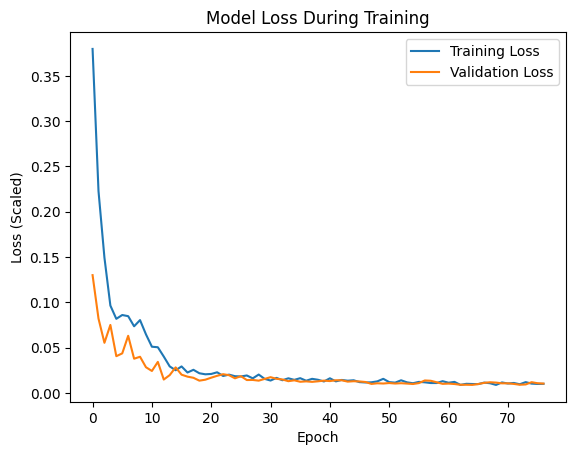

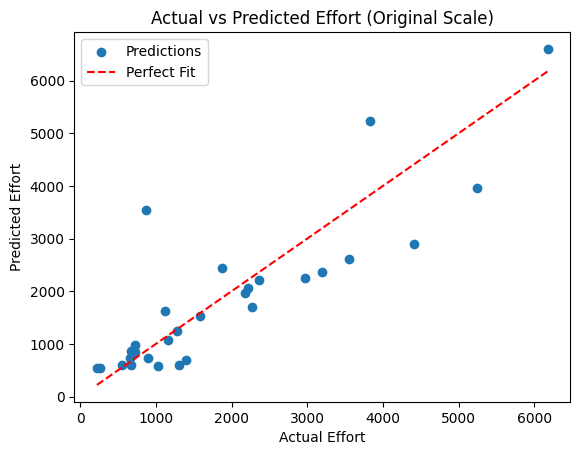

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

# Calculate relative errors for MMRE and MdMRE
relative_errors = np.abs((y_test_original - y_pred) / y_test_original)
mmre = np.mean(relative_errors)
mdmre = np.median(relative_errors)

# Calculate PRED(25)
pred25 = np.mean(relative_errors <= 0.25) * 100

# Print all metrics
print(f"\nEvaluation Metrics (Original Scale):")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MMRE: {mmre:.4f}")
print(f"MdMRE: {mdmre:.4f}")
print(f"PRED(25): {pred25:.2f}%")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (Scaled)')
plt.legend()
plt.show()

# Plot actual vs predicted
plt.scatter(y_test_original, y_pred, label='Predictions')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', label='Perfect Fit')
plt.xlabel('Actual Effort')
plt.ylabel('Predicted Effort')
plt.title('Actual vs Predicted Effort (Original Scale)')
plt.legend()
plt.show()